<div align="center">
    <img src='https://media-exp1.licdn.com/dms/image/C561BAQFV4oU27rzxaQ/company-background_10000/0/1562869489836?e=2147483647&v=beta&t=OMHL6Izxqw7r8S5fn9gDQM1hNMKgo3yqMlH1F3Iwm9o' style='height:300px;'>
</div>


<center><h1 style='font-size:35px'>Exploración y Curación de Datos - Melburn Australia</h1></center>

---

**Fecha de creación: 2/06/2022**

**Autores**:
* Marilina Trevisan (marilinatrevisan@gmail.com).
* Gustavo Ariel Venchiarutti (gustavo.venchiarutti@gmail.com).
* Ani Salama (anisalama@gmail.com).
* Anahí Sulca (nanisulca@gmail.com).
* Agustín Trulli (agustintrulli@gmail.com).

**Grupo: 6**

##Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# Descripción del dataset
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Esta compuesto por
# 1- Array de texto boston['DESCR']
# 2- Matriz de datos con 506 filas y 13 columnas boston['data']
# 3- Array con la definicon de nombres de cada columna boston['feature_name']
# 4- Array con el objetivo que representan las y de los datos que son los x. boston['target']

boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
# Asigno la matriz con los datos de entrada (atributos)
X = boston['data']

In [6]:
# Asigno los nombres de las columnas que estan en el array 'feature_names'
columnas = boston['feature_names']

In [7]:
# Asigno el array de valores a predecir
y = boston['target']

In [8]:
# Cantidad de elementos boston['data'] es una matriz que tiene 506 filas y 13
# columnas. boston['target'] es un array de 506 elementos que surgen de una funcion
# aplicada a boston['data']
X.shape, y.shape

((506, 13), (506,))

In [9]:
# Armo un data frame con los datos para poder visualizarlos y les coloco el nombre las columnas
import pandas as pd
import numpy as np


boston_df=pd.DataFrame(X, columns=columnas)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

**1. ¿De qué se trata el conjunto de datos?**

Este conjunto de datos se refiere a la informacion de viviendas del area metropolitana de Boston. Fue recopilada por estudiantes de posgrado o asistentes de David Harrison Jr. (Harvard) y Daniel L. Rubinfeld para su análisis descripto en el documento "Hedonic housing prices and the demand for clean air" de 1978. Este informe analiza las características de la calidad del aire que pueden haber afectado los precios medios, en el mercado de viviendas durante la década de 1970 en el Área Estadística Metropolitana Estándar de Boston. 


**2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?**
La variable objetivo que queremos determinar se encuentra en la columna 14 boston['target'], es el  Valor Medio de las viviendas ocupadas por sus propietarios, expresado en miles de dólares. Pretende identificar los precios promedio de las viviendas habitadas por sus propietarios que se encuentran en el area metropolitana de Boston. Valor que puede verse afectado por los factores internos o externos que se encuentran detallados en las 13 columnas del data frame que tenemos en datos boston['data'].  


**3. ¿Qué información (atributos) hay disponibles para hacer la predicción?**

Estructurales:
1.   *RM*: número medio de habitaciones en viviendas propietarias. Censo de los Estados Unidos de 1970
2.   *AGE*: proporción de viviendas propietarias construidas antes de 1940. Censo de los Estados Unidos de 1970

Vecindario:
1.   *B*: Proporción negra de la población. Censo de los Estados Unidos de 1970
2.   LSTAT: Proporción de la población que es de menor estatus = 1/2 * (proporción de adultos sin alguna educación secundaria y proporción de trabajadores masculinos clasificados como trabajadores). Censo de los Estados Unidos de 1970
3.   *CRIM*: Tasa de criminalidad por ciudad. (FBI (1970))
4.   *ZN*:  Proporción de la tierra residencial de una ciudad zonificada para lotes mayores de 25,000 pies cuadrados. (Comisión de Planificación del Área Metropolitana (1972))
5.   *INDUS*: Proporción de acres comerciales no minoristas por ciudad.
(Vogt, Ivers y Asociados)
6.   *TAX*: Tasa de impuesto a la propiedad de valor total ($/$10.000).
(Massachusetts Tax-payers Foundation (1970))
7.   *PTRATIO*: Proporción de alumnos por maestro por distrito escolar de la ciudad. (Mass. Dept. of Education (1971–1972))
8.   *CHAS*: Charles River dummy 1 si el tramo limita con el río Charles o 0 en caso contrario. (Mapas de la sección censal de los Estados Unidos de 1970)

Accesibilidad
1.   *DIS*: Distancias ponderadas a cinco centros de empleo en la región de Boston. (Schnare)
2.   *RAD*: Índice de accesibilidad a las carreteras radiales. (Proyecto MIT Boston)

Contaminación atmosférica
1.   *NOX*: Concentraciones de óxido de nitrógeno en pphm. (TASSIM)

**4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?**

Considerando los datos del data frame y el objetivo que se quiere obtener de su analisis los mas determinates son los de *Contaminación atmosférica*


**5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.**

Verificando la informacion del data frame primero que nada resalta la columna de datos *B* como la cantidad de población negra en el vecindario. El sesgo es totalmente racista. Si estos datos se utilizan para predecir, o incluso influir en los modelos futuros, entonces el racismo sistémico seguirá siendo un factor de fijación de precios. Además, la columna no representa los datos originales sino que son el resultado de aplicar la siguiente cuadratica funcion:
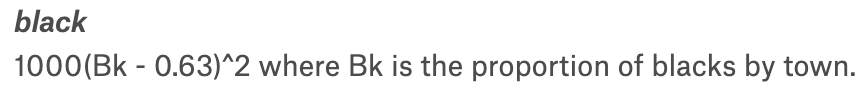
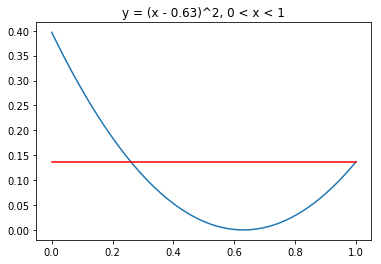

Informacion obtenidad de la siguiente pagina:
https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8

### Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

####Respuesta 1

##### Datos Estructurales

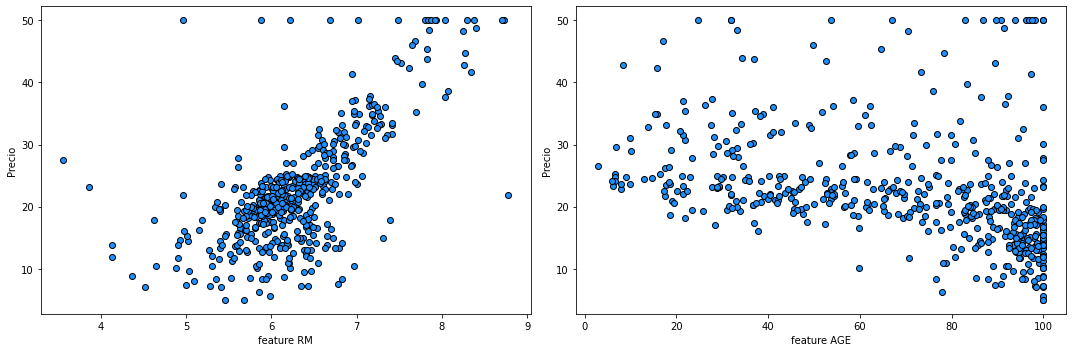

In [10]:
feature = np.array(['RM','AGE'])

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.ravel()
for i in range(len(feature)):
    selector = (boston['feature_names'] == feature[i])
    axs[i].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    axs[i].set_xlabel(f'feature {feature[i]}')
    axs[i].set_ylabel('Precio')
fig.tight_layout()
plt.show()

##### Datos de Vecindario

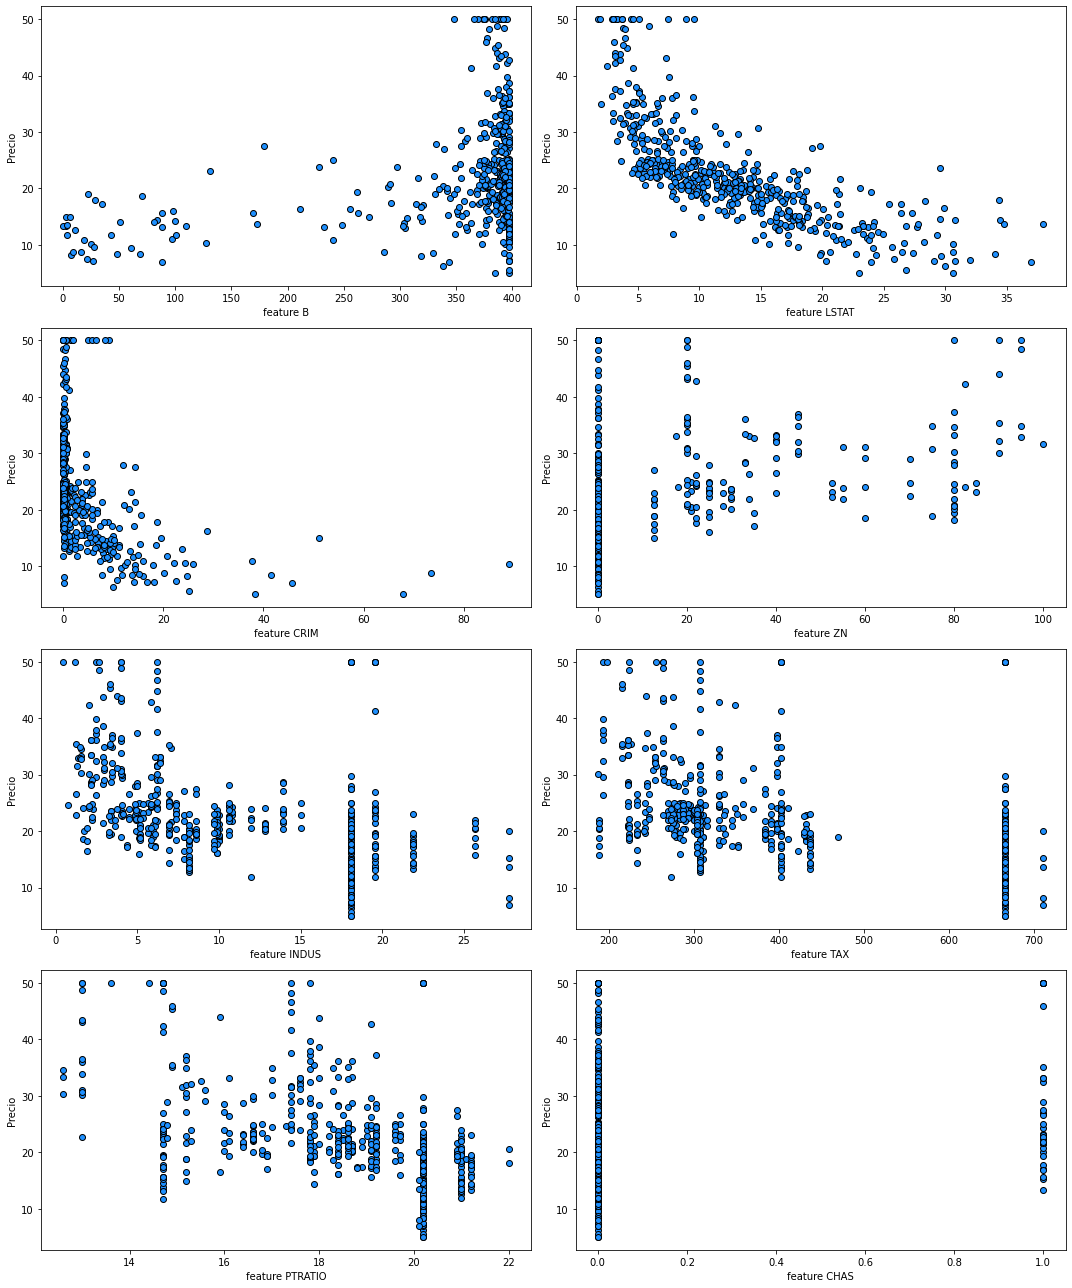

In [11]:
feature = np.array(['B','LSTAT', 'CRIM', 'ZN','INDUS', 'TAX', 'PTRATIO', 'CHAS'])

fig, axs = plt.subplots(4, 2, figsize=(15, 18))
axs = axs.ravel()
for i in range(len(feature)):
    selector = (boston['feature_names'] == feature[i])
    axs[i].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    axs[i].set_xlabel(f'feature {feature[i]}')
    axs[i].set_ylabel('Precio')
fig.tight_layout()
plt.show()

##### Datos de Accesibilidad

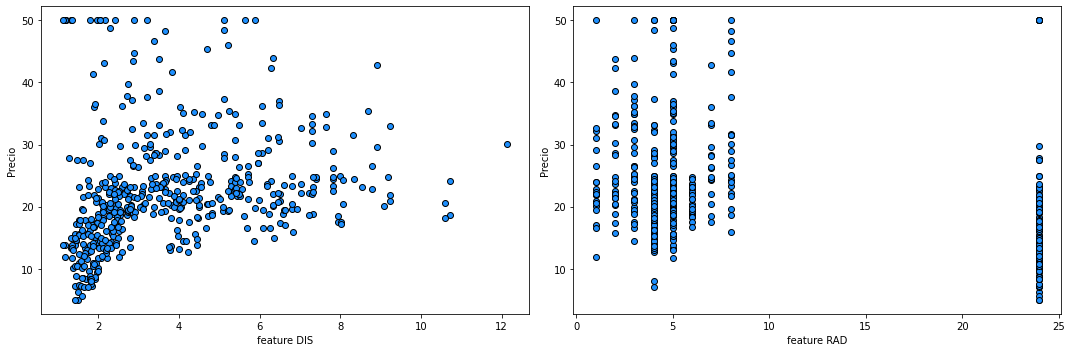

In [12]:
feature = np.array(['DIS','RAD'])

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.ravel()
for i in range(len(feature)):
    selector = (boston['feature_names'] == feature[i])
    axs[i].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    axs[i].set_xlabel(f'feature {feature[i]}')
    axs[i].set_ylabel('Precio')
fig.tight_layout()
plt.show()

##### Dato Contaminación atmosférica

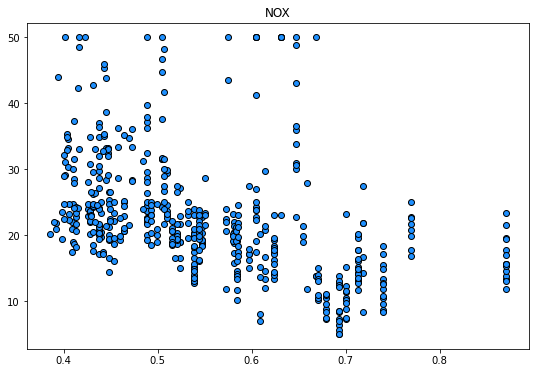

In [13]:
plt.figure(figsize=(9,6))
feature = 'NOX'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

####Respuesta 2

Observando los gráficos de las variables explicativas a OJO parece que  las más informativos para la predicción son **RM** y  **LSTAT**. También consideramos **NOX** por ser la variable que pretendía estudiar la investigación original aunque en el gráfico no se observa gran poder explicativo de esta variable sobre la variable target.

####Respuesta 3

1-RM: número medio de habitaciones en viviendas propietarias. Censo de los Estados Unidos de 1970

2-LSTAT: Proporción de la población que es de menor estatus = 1/2 * (proporción de adultos sin alguna educación secundaria y proporción de trabajadores masculinos clasificados como trabajadores). Censo de los Estados Unidos de 1970

3-NOX: Concentraciones de óxido de nitrógeno en pphm. (TASSIM)

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((404, 13), (102, 13), (404,), (102,))

### Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

#### Respuesta 1

Considerando el objetivo del analisis vamos a tomar las siguientes variables que pueden afectar al valor de las viviendas al momento de la venta. 

*RM*: número medio de habitaciones en viviendas propietarias. Censo de los Estados Unidos de 1970.

2-LSTAT: Proporción de la población que es de menor estatus = 1/2 * (proporción de adultos sin alguna educación secundaria y proporción de trabajadores masculinos clasificados como trabajadores). Censo de los Estados Unidos de 1970.

*NOX*: Concentraciones de óxido de nitrógeno en pphm. (TASSIM).

Defino las funciones que voy a utilizar en la Regresion Lineal

1.   Determina el modelo de ENTRENAMIENTO calculando la raiz(x,y) de la funion lineal a partir de las series de datos X_train que páso por parametro
2.   Con el modelo calculado, paso los datos de test con X_test y las raices del modelo, y con esta funcion puedo predecion la aproximacion del modelo obtenido

####**Modelo sklearn**

##### Atributo RM

**Error de test < 50**

###### Respuesta 2

In [15]:
# Como estamos trabajando con polinomios tenemos que utilizar los datos de entrenamiento 
# y test como originalmente se dividieron. Usamos el mismo atributo del ejercicio anterior
feature = 'RM'
selector = (boston['feature_names'] == feature)

# Tengo que poner la columna NOX en una lista de valores para que pueda realizar el analisis
X_train_RM = (X_train[:, selector])
X_test_RM = (X_test[:, selector])

X_train_RM.shape, X_test_RM.shape, y_train.shape, y_test.shape 

((404, 1), (102, 1), (404,), (102,))

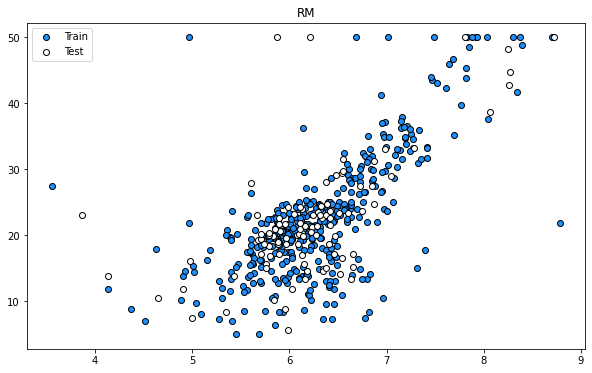

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_RM, y_train, color="dodgerblue", edgecolor="k", label="Train")
plt.scatter(X_test_RM, y_test, color="white", edgecolor="k", label="Test")
plt.title(feature)
plt.legend()
plt.show()

In [17]:
# ESte es solo de prueba para mostra como funciona la libreria  que genera poñl.inomios
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Asignamos a la variable el modelo de regresion lineal de sklearn
lr = linear_model.LinearRegression()

In [18]:
# ENTRENAMIENTO
# Al modelo lineal lr lo enterno con los datos que separamos para el entrenamiento y se los
# pasamos como parametro. Asi con la funcion fit y los datos que paso, me arme la mejor funcion lineal 
lr.fit(X_train_RM,y_train)


LinearRegression()

In [19]:
# PREDICCION
# Una vez que tenemos el modelo construido en funcion de los datos de enternamiento realizo una 
# prediccion utilizando el modelo lr pero ahora verificando con los datos de prueba
y_train_pred_RM = lr.predict(X_train_RM)
y_test_pred_RM = lr.predict(X_test_RM)

y_train_pred_RM, y_test_pred_RM

(array([28.69905774, 19.41643726, 28.19273298, 19.89463286, 13.25615277,
        10.05880572, 20.90728237, 24.42342649, 28.62404666, 16.19096106,
        21.39485435, 18.58193906, 16.32223044, 20.38220485, 19.17265127,
        23.27013122, 10.74328177, 37.81290329, 26.71126426, 15.28145178,
        16.0503153 , 19.96026755, 19.51957749, 18.64757375, 33.09658198,
        16.07844445, 19.0976402 , 31.66199518, 24.19839326, 27.11444879,
        19.62271772, 18.61006821, 27.50825693, 31.49322026, 20.5884853 ,
        14.18441482, 26.51436019, 23.85146705, 23.34514229, 19.08826381,
        28.97097288, 24.57344864, 22.34186917, 18.02873239, 30.42431245,
        30.53682906, 21.59175843, 13.00299039, 25.73612029, 23.81396151,
        10.58388324, 24.82661101, 22.923205  , 23.01696884, 19.41643726,
        21.11356283, 15.97530422, 15.750271  , 21.20732667, 20.68224915,
        28.85845627, 33.0215709 , 30.13364454, 20.56035615, 20.16654801,
        25.58609814, 23.51391721, 18.72258483, 25.4

DATOS DE REGRESION LINEAL

Si la funcion de una recta tiene la siguiente definicion **f(x) = ax + b**, acontinuacion de detallan los valores de cada variable

In [20]:
# Valor de la pendiente o coeficiente "a"
lr.coef_

array([9.37638431])

In [21]:
# Valor de ordenada al origen coeficiente "b"
lr.intercept_

-36.47618962764732

In [22]:
# Precision del modelo
lr.score(X_train_RM, y_train), lr.score(X_test_RM, y_test)

(0.4970800097843844, 0.42394386816456275)

In [23]:
# 3. Predecir y evaluar 
from sklearn.metrics import mean_squared_error

# evaluate:
train_error = mean_squared_error(y_train, y_train_pred_RM)
test_error = mean_squared_error(y_test, y_test_pred_RM)

print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 42.820479
Test error: 46.907352


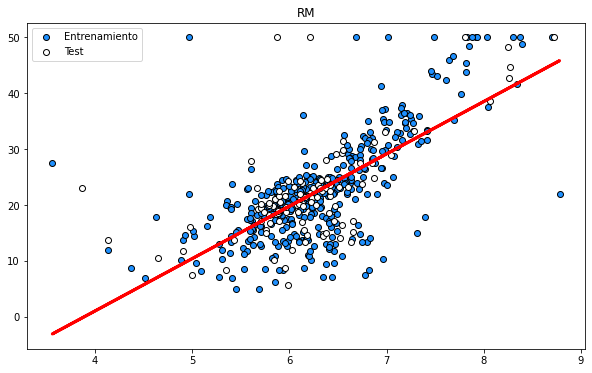

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_RM, y_train, color="dodgerblue", edgecolor="k", label="Entrenamiento")
plt.scatter(X_test_RM, y_test, color="white", edgecolor="k", label="Test")
# Utilizando los datos de test para representar la recta del modelo
#plt.plot(X_test_RM, y_test_pred_RM, color='green', linewidth=3)
# Utilizando los datos de test para representar la recta del modelo
plt.plot(X_train_RM, y_train_pred_RM, color='red', linewidth=3)
plt.title(feature)
plt.legend()
plt.show()

Vemos que el error cuadratico medio en el caso del entrenamiento y el test es bastante similar por lo que pareciera no haber problemas de overfitting. El error en ambos casos es mejnor a 50, por lo que la variable RM tiene buen valor explicativo sobre MEDV (variable target).

REGRESIÓN LINEAL USANDO LSTAT COMO VARIABLE EXPLICATIVA


In [25]:
# Divido en train y test 
feature = 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_F = (X_train[:, selector])
X_test_F = (X_test[:, selector])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [26]:
# Entreno la regresión lineal con la feature 'LSTAT'

regressor = LinearRegression()

regressor.fit(X_train_F, y_train)

LinearRegression()

In [27]:
# calculo el error cuadrático medio para train y test
mse = {}

y_pred_train = regressor.predict(X_train_F)
y_pred_test = regressor.predict(X_test_F)

mse['train'] = mean_squared_error(y_train, y_pred_train)
mse['test'] = mean_squared_error(y_test, y_pred_test)

print('Error cuadrático medio (MSE) por set:')
mse

Error cuadrático medio (MSE) por set:


{'train': 36.523966406959666, 'test': 46.33630536002592}

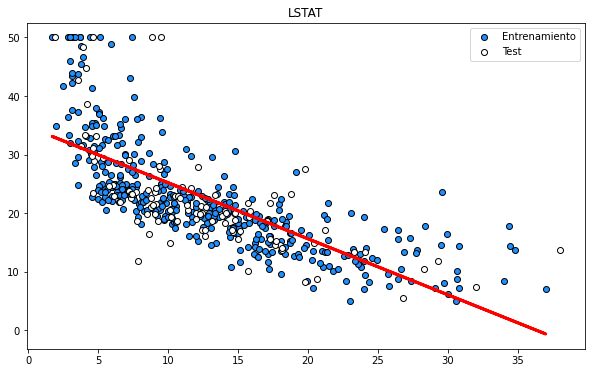

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_F, y_train, color="dodgerblue", edgecolor="k", label="Entrenamiento")
plt.scatter(X_test_F, y_test, color="white", edgecolor="k", label="Test")
# Utilizando los datos de test para representar la recta del modelo
#plt.plot(X_test_RM, y_test_pred_RM, color='green', linewidth=3)
# Utilizando los datos de test para representar la recta del modelo
plt.plot(X_train_F, y_pred_train, color='red', linewidth=3)
plt.title(feature)
plt.legend()
plt.show()

Para esta variable LSTAT las diferencias entre el error de los datos de entrenamiento y test son mayores, por lo cual el modelo de regresión lineal podría no ser la mejor opcion (analizamos esto en el ejercicio siguiente).

REGRESIÓN LINEAL USANDO NOX COMO VARIABLE EXPLICATIVA

In [29]:
# Divido en train y test 
feature = 'NOX'
selector = (boston['feature_names'] == feature)
X_train_F = (X_train[:, selector])
X_test_F = (X_test[:, selector])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [30]:
# Entreno la regresión lineal con la feature 'NOX'

regressor = LinearRegression()

regressor.fit(X_train_F, y_train)

LinearRegression()

In [31]:
# calculo el error cuadrático medio para train y test
mse = {}

y_pred_train = regressor.predict(X_train_F)
y_pred_test = regressor.predict(X_test_F)

mse['train'] = mean_squared_error(y_train, y_pred_train)
mse['test'] = mean_squared_error(y_test, y_pred_test)

print('Error cuadrático medio (MSE) por set:')
mse

Error cuadrático medio (MSE) por set:


{'train': 67.16125280760986, 'test': 76.95375968209432}

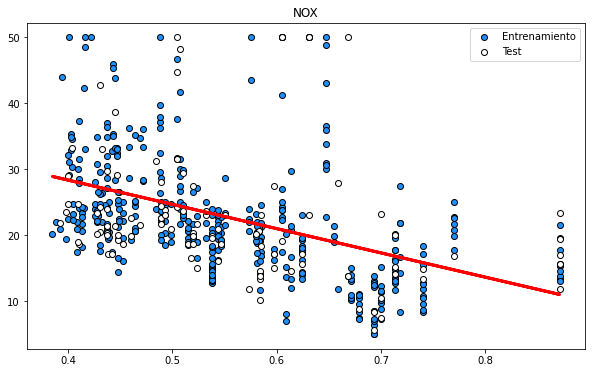

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_F, y_train, color="dodgerblue", edgecolor="k", label="Entrenamiento")
plt.scatter(X_test_F, y_test, color="white", edgecolor="k", label="Test")
# Utilizando los datos de test para representar la recta del modelo
#plt.plot(X_test_RM, y_test_pred_RM, color='green', linewidth=3)
# Utilizando los datos de test para representar la recta del modelo
plt.plot(X_train_F, y_pred_train, color='red', linewidth=3)
plt.title(feature)
plt.legend()
plt.show()

En este caso vemos que el error cuadrático tanto para los datos de entrenamiento como para los de test es mayor a 50, por lo cual concluímos que no es una buena bvariable explicativa de la variable target, al menos con el modelo lineal.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [33]:
# Como estamos trabajando con polinomios tenemos que utilizar los datos de entrenamiento 
# y test como originalmente se dividieron. Usamos el mismo atributo del ejercicio anterior
feature = 'RM'
selector = (boston['feature_names'] == feature)
# Tengo que poner la columna NOX en una lista de valores para que pueda realizar el analisis
X_train_RM = (X_train[:, selector])
X_test_RM = (X_test[:, selector])

X_train_RM.shape, X_test_RM.shape, y_train.shape, y_test.shape 

((404, 1), (102, 1), (404,), (102,))

####Respuesta 1

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []
grados = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for grado in grados:
    # train:
    pf = PolynomialFeatures(grado)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_RM, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_RM)
    y_test_pred = model.predict(X_test_RM)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

train_errors, test_errors

([85.1437202235075,
  42.820478941727515,
  37.74552897028127,
  36.39565875767101,
  34.80844625691348,
  33.131121571954864,
  33.13011641557052,
  33.06035876451879,
  33.0603572232871,
  32.85494797877433,
  32.800430350425714,
  32.753751316220544,
  32.717733513387635,
  32.69254959956946,
  32.67564443205382],
 [81.58231743908232,
  46.907351627395315,
  39.79473116372657,
  39.82576208821368,
  41.55392567544968,
  41.03828856597975,
  41.00917694350242,
  42.39410678682075,
  42.399209047236745,
  46.06407013111704,
  44.96835113579666,
  43.74190796095928,
  42.547152980683535,
  41.463301707654715,
  40.550397793739194])

#### Respuesta 2

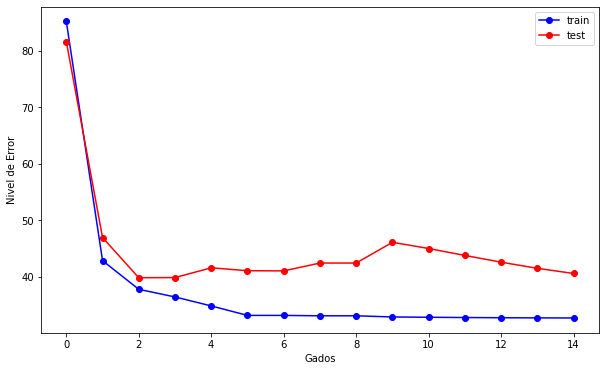

In [35]:
# Graficar las curvas de error con los array calculados
plt.figure(figsize=(10,6))
plt.plot(grados, train_errors, color="blue", label="train", marker='o')
plt.plot(grados, test_errors, color="red", label="test", marker='o')
plt.legend()
plt.xlabel("Gados")
plt.ylabel("Nivel de Error")
plt.show()

#### Respuesta 3

En la gráfica de errores se puede observar que a medida que aumentamos el grado del polinomio la diferencia que genera el modelo entrenamiento y test se va agrandadon o creciendo. La diferencia mínima se obtiene en el grado 2 para la variable RM, por lo tanto se estiman los coeficientes para ese grado. 

#### Respuesta 4

In [36]:
#De acuerdo a la gráfica anterior, y como era de esperarse, el modelo que mejor ajusta los datos es el de grado 2:

grado = 2
# train:
pf = PolynomialFeatures(grado)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)
model.fit(X_train_RM, y_train)

# predict:
y_train_pred = model.predict(X_train_RM)
y_test_pred = model.predict(X_test_RM)

# evaluate:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 37.745529
Test error: 39.794731


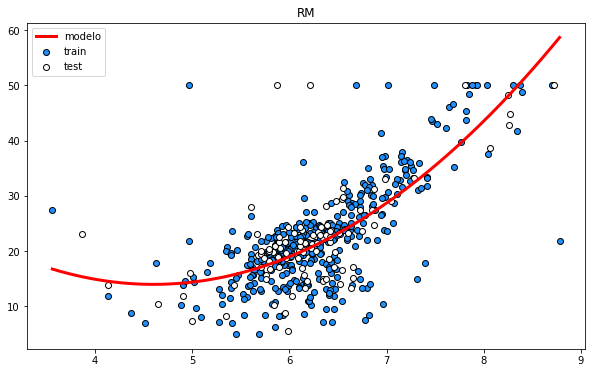

In [37]:
x_start = min(np.min(X_train_RM), np.min(X_test_RM))
x_end = max(np.max(X_train_RM), np.max(X_test_RM))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(10,6))
plt.scatter(X_train_RM, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_RM, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x), color="red", label="modelo", linewidth=3)
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

####Respuesta 1

In [38]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'NOX') | (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape, y_train.shape, y_test.shape

((404, 3), (102, 3), (404,), (102,))

####Respuesta 2

In [39]:
# 2. Resolver acá.
train_errors = []
test_errors = []
degrees = range(1,9)
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

print('Min Test Error:', min(test_errors))
print('Train Error:', train_errors[test_errors.index(min(test_errors))])

Min Test Error: 26.284006875630105
Train Error: 16.120676453071514


In [40]:
train_errors, test_errors

([28.635298783412125,
  16.120676453071514,
  12.323504395259823,
  9.695929731523908,
  11.773862792945597,
  7.958372352071601,
  6.4954453349902295,
  6.819214639795606],
 [38.1130179772881,
  26.284006875630105,
  30.107616202182445,
  28.562011098723794,
  43.94281683130752,
  178.48535839341503,
  796.5969720526228,
  1484.3168807481788])

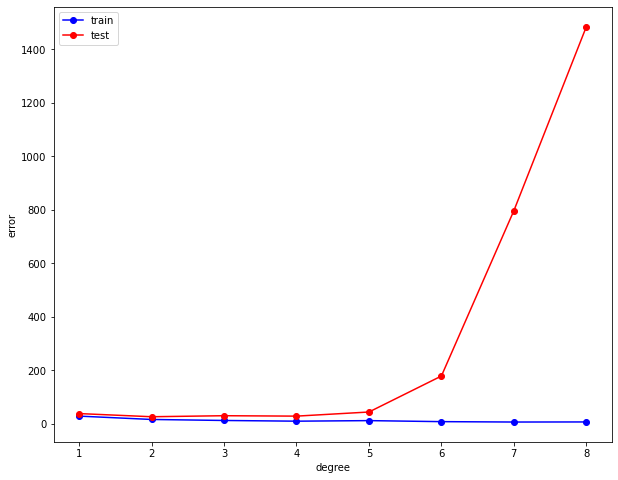

In [41]:
plt.figure(figsize=(10,8))
plt.plot(degrees, train_errors, color="blue", label="train", marker='o')
plt.plot(degrees, test_errors, color="red", label="test", marker='o')
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

#### Respuesta 3

En lo que respecta al grado del polinomio, es el mismo que en el caso anterior (2), y a partir del cual el error en el conjunto de entrenamiento aumenta produciendo un sobre ajuste. Lo que se tiene en este caso es el error en el test de entrenamiento es menor (29.4). Vemos que con un polinomio de grado 2 se simplifica el modelo y se obtiene una diferencia mínima entre el error de los datos de entrenamiento y los de test evitandose el overfitting. 

## Más ejercicios (opcionales)



### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [42]:
# 1. Resolver acá. Ayuda (con dos atributos):

X_train_fs = X_train
X_test_fs = X_test
X_train_fs.shape, X_test_fs.shape

((404, 13), (102, 13))

In [43]:
#tarda bastante en ejecutarse por la complejidad del calculo ya que se usan 13 variables explicativas en 9 grados
train_errors = []
test_errors = []
degrees = range(1,9)
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

print('Min Test Error:', min(test_errors))
print('Train Error:', train_errors[test_errors.index(min(test_errors))])

Min Test Error: 25.215797588713475
Train Error: 6.310156139613897


In [44]:
train_errors, test_errors

([19.326470203585725,
  6.310156139613897,
  2.3149828877059196e-11,
  2.181224272568984e-19,
  7.170409732238487e-20,
  6.248858930951638e-20,
  1.0969559819686726e-18,
  8.909211172275473e-20],
 [33.44897999767658,
  25.215797588713475,
  1050370.618172887,
  981357.4418694061,
  200225.48805484988,
  200922.25496120407,
  24855.358222726103,
  173598.2563096407])

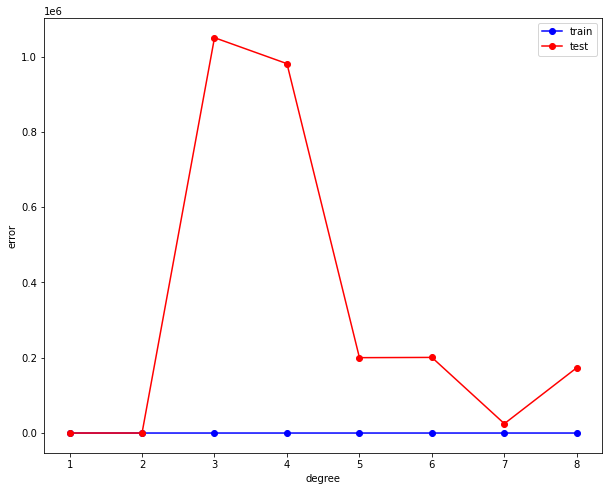

In [45]:
plt.figure(figsize=(10,8))
plt.plot(degrees, train_errors, color="blue", label="train", marker='o')
plt.plot(degrees, test_errors, color="red", label="test", marker='o')
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Usando todos los atributos de entrada, se observa que hay una disminucion importante en los errores tanto para el set de entrenamiento, como para el de testeo. Se concluye que el grado 2 es el que minimiza errores con baja complejidad.


### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [46]:
from sklearn.linear_model import Ridge
Alpha=0.2
degree = 2
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=Alpha))
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
   
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 4.511095
Test error: 33.705832


In [47]:
train_errors = []
test_errors = []
#alphas=np.logspace(0,1,10)
alphas = (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
for alpha in alphas:
    # train:
    model = make_pipeline(PolynomialFeatures(2), Ridge(alpha=alpha))
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

print('Min Test Error:', min(test_errors))
print('Train Error:', train_errors[test_errors.index(min(test_errors))])

Min Test Error: 31.725369873323732
Train Error: 4.731727942903078


In [48]:
train_errors, test_errors

([4.444033901684105,
  4.5110954099970035,
  4.559755861158691,
  4.597608652875222,
  4.6285041622223835,
  4.654609073956003,
  4.677248161531405,
  4.697283758429975,
  4.715304604517888,
  4.731727942903078],
 [34.3274535256969,
  33.70583227882075,
  33.349595690242815,
  33.07492072879827,
  32.82964081297863,
  32.59710737171747,
  32.37166551552191,
  32.151463587340686,
  31.93602823663341,
  31.725369873323732])

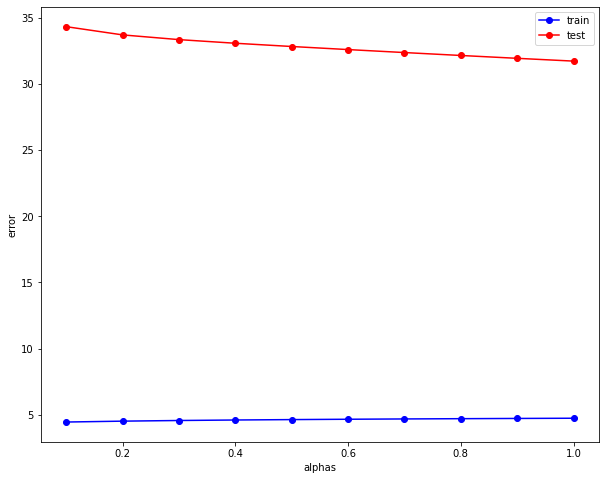

In [49]:
plt.figure(figsize=(10,8))
plt.plot(alphas, train_errors, color="blue", label="train", marker='o')
plt.plot(alphas, test_errors, color="red", label="test", marker='o')
plt.legend()
plt.xlabel("alphas")
plt.ylabel("error")
plt.show()

En el último gráfico podemos observar que el error del conjunto de test disminuye a medida que alpha se aproxima a 1. 